<a href="https://colab.research.google.com/github/Balajireddy2002/20a91a0582/blob/main/week7%2C8%2C9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINK TO DOWNLOAD DATASET FOR WEEK-7:


https://www.kaggle.com/datasets/naveengowda16/logistic-regression-heart-disease-prediction

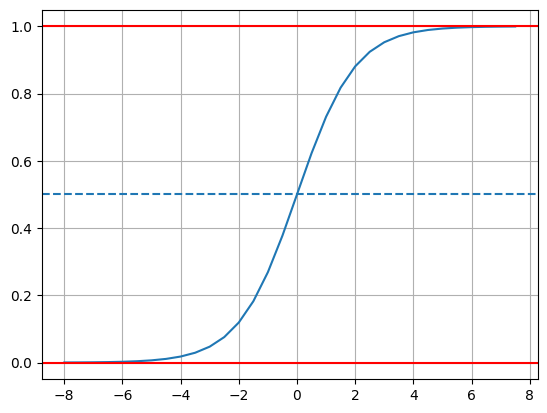

In [ ]:
#week7
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the dataset into google colab
df=pd.read_csv('/framingham_heart_disease.csv')

#define a sigmoid function
def sigmoid_func(x):
    return 1.0 / (1 + math.exp(-x))

# create an array series
x = pd.Series(np.arange(-8, 8, 0.5))
y = x.map(sigmoid_func)

#plot the above generated series
plt.plot(x, y)
plt.grid(True)
plt.axhline(y=0.5, xmin=0, xmax=10, ls='dashed')
plt.axhline(y=1.0, xmin=0, xmax=10, color='r')
plt.axhline(y=0.0, xmin=0, xmax=10, color='r')

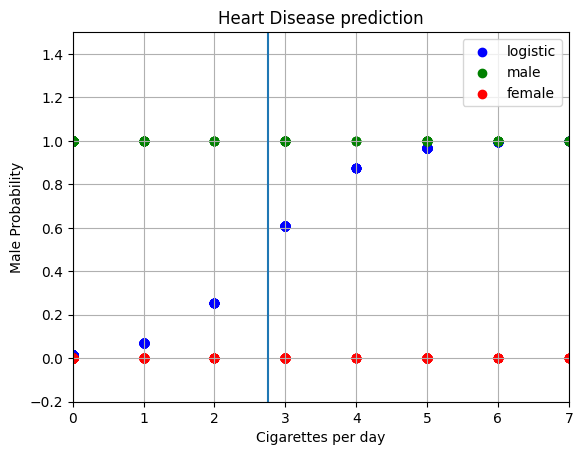

In [ ]:
#plot the values
plt.scatter(x=df.cigsPerDay, y=y_vals, color='b', label='logistic')
plt.scatter(x=df[df.male==1].cigsPerDay, y=df[df.male==1].male, color='g', label='male')
plt.scatter(x=df[df.male==0].cigsPerDay, y=df[df.male==0].male, color='r', label='female')
plt.title("Heart Disease prediction")
plt.xlabel("Cigarettes per day")
plt.ylabel("Male Probability")
plt.legend()
plt.grid(True)
plt.xlim((0, 7))
plt.ylim((-0.2, 1.5))
plt.axvline(x=2.75, ymin=0, ymax=1)
plt.show()

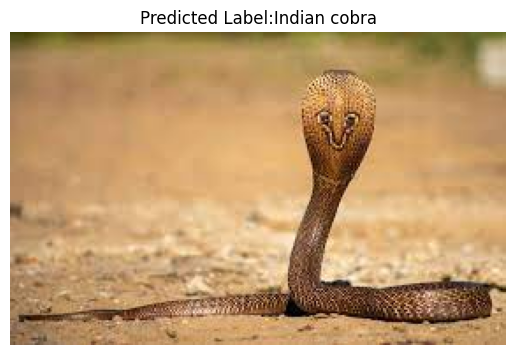

In [ ]:
#pip install torch torchvision
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import requests
import matplotlib.pyplot as plt

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

    def forward(self, x):
        x = self.features(x)
        return x
# Load a pre-trained AlexNet model from torchvision
model = models.alexnet(pretrained=True)
model.eval()
img = Image.open("/content/cobra.jpg")

# Preprocess the image
img_tensor = preprocess(img)
img_tensor = img_tensor.unsqueeze(0)  # Add batch dimension

# Make predictions
with torch.no_grad():
    output = model(img_tensor)

# Load the class labels for ImageNet
LABELS_URL = "https://raw.githubusercontent.com/anishathalye/imagenet-simple-labels/master/imagenet-simple-labels.json"
labels = requests.get(LABELS_URL).json()

# Get the predicted class index
_, predicted_idx = torch.max(output, 1)

# Get the predicted class label
predicted_label = labels[predicted_idx.item()]
plt.imshow(img)
plt.title("Predicted Label:"+ predicted_label)
plt.axis('off')
plt.show()

Epoch 1/5
235/235 [==============================] - 3s 12ms/step - loss: 0.2767 - val_loss: 0.1912
Epoch 2/5
235/235 [==============================] - 4s 15ms/step - loss: 0.1722 - val_loss: 0.1550
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.1456 - val_loss: 0.1350
Epoch 4/5
235/235 [==============================] - 3s 11ms/step - loss: 0.1302 - val_loss: 0.1232
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


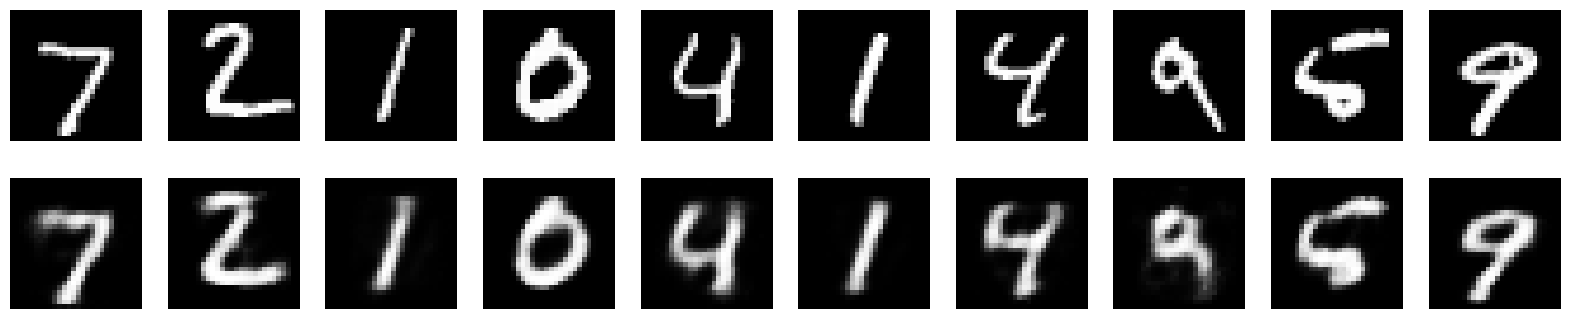

In [ ]:
#WEEK-9
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255.0, x_test.astype('float32') / 255.0
x_train, x_test = x_train.reshape(len(x_train), -1), x_test.reshape(len(x_test), -1)

# Create a simple autoencoder
encoding_dim, input_shape = 32, (784,)
input_layer = Input(shape=input_shape)
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(inputs=input_layer, outputs=decoded)

# Compile and train the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode and decode data
encoded_imgs = autoencoder.predict(x_test)

# Plot original and decoded images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n * 2):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray') if i < n else plt.imshow(encoded_imgs[i - n].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()